In [177]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.misc import derivative
from numdifftools import Gradient
from sympy import symbols, solve
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

# Linear Algebra

In [178]:
# square root of matrix
Q = np.array([[1,0.9],[0.9,1]])
B = la.sqrtm(Q)

# Calculate Eigenvalues and Eigen Vectors

In [121]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
    
A = np.array([[1,2,3,4],[2,3,4,1],[3,4,1,2],[4,1,2,3]])
print(A)
results = la.eig(A)
eigenvectors = np.transpose(results[1])

for i,eigenvalue in enumerate(results[0]):
    print("lambda_%d: %.3f"%(i,eigenvalue))
    print("v_%d"%(i),eigenvectors[i])

print("\n M or L= %.3f"%(max(results[0])))
print("m= %.3f"%(min(results[0])))

# for i, eigenvector1 in enumerate(eigenvectors):
#     for j, eigenvector2 in enumerate(eigenvectors[i+1:]):
#         print("<v_%d, v_%d> = %.3f"%(i, i+j+1,np.inner(eigenvector1,eigenvector2)))

[[1 2 3 4]
 [2 3 4 1]
 [3 4 1 2]
 [4 1 2 3]]
lambda_0: 10.000
v_0 [0.500 0.500 0.500 0.500]
lambda_1: 2.828
v_1 [0.271 -0.653 -0.271 0.653]
lambda_2: -2.828
v_2 [-0.653 -0.271 0.653 0.271]
lambda_3: -2.000
v_3 [-0.500 0.500 -0.500 0.500]

 M or L= 10.000
m= -2.828


/home/arky/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
/home/arky/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/home/arky/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


# Plot Feasible Region

Text(0.5, 0, '$x_1$')

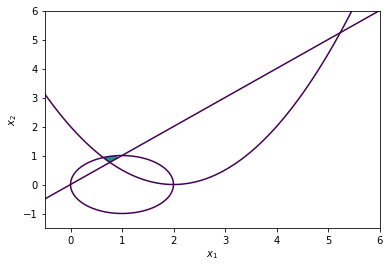

In [3]:
numPoints = 100
x1Line = np.linspace(-0.5,6,numPoints)
x2Line = np.linspace(-1.5,6,numPoints)
x1, x2 = np.meshgrid(x1Line,x2Line)
y1 = x1**2-2*x1+x2**2
y2 = 0.5*x1**2-2*x1-x2+2
y3 = x1-x2
ax1 = plt.contour(x1,x2,y1,[0])
ax2 = plt.contour(x1,x2,y2,[0])
ax3 = plt.contour(x1,x2,y3,[0])
y4 = np.maximum.reduce([y1,y2,y3])
plt.contourf(x1,x2,y4,[-10,0])
plt.ylabel("$x_2$")
plt.xlabel("$x_1$")

# KKT Test
$\min :\left\{x_{1}^{2}+x_{2}^{2}-2 x_{1}-4 x_{2}-9: x_{1}+x_{2} \leq 2, \frac{1}{3} x_{1}+x_{2} \leq 1, x_{1}, x_{2} \geq 0\right\}$

In [113]:

# def df0(x):
#     x1 = x[0]
#     x2 = x[1]
#     return 2*x1+2*x2-2-4

def primalFeasible(x,fs):
    for f in fs:
        if f(x)>0: return False
    if x[0]<0 or x[1]<0: return False
    return True

def nonZeroDual(x,fs):#complementarySlackness
    dualVars = []
    for f in (fs):
        if f(x)!=0:
            dualVars += [0]
        else:
            dualVars += [1]
    return dualVars

def stationarity(x, nonZeroDualsol,fs):
    gradients = []    
    for i in range(len(fs)):
        if nonZeroDualsol[i]==0:
            gradients+= [0]
        else:
            gradients+= [Gradient(fs[i])(x)]
    l1 = symbols('l1')
    l2 = symbols('l2')
    l3 = symbols('l1')
    l4 = symbols('l2')
    expr = Gradient(f0)(x) + l1*gradients[0]+l2*gradients[1]
    sol = solve(expr)
    if len(sol)==0: return []
    sol = np.array(list(sol.values()))
    return sol*np.array(nonZeroDualsol)

def dualFeasible(dualSol):
    for i in dualSol:
        if i<0:
            return False
    return True
        
    
def KKT(x,fs):
    if primalFeasible(x,fs)!=True:
        print('x is not primal feasible')
        return
    nonZeroDualsol = nonZeroDual(x,fs)
    print('Nonzero dual variables:', nonZeroDualsol)
    dualsol = stationarity(x, nonZeroDualsol, fs)
    if len(dualsol)>0:
        print('Dual variables:', dualsol)
        if dualFeasible(dualsol):
            print('Dual solution feasible')
        else:
            print('Dual solutions not feasible')
    else:
        print('no dual solution')
    

In [116]:
def f0(x):
    x1 = x[0]
    x2 = x[1]
    return x1**2+x2**2-2*x1-4*x2-9

def f1(x):
    x1 = x[0]
    x2 = x[1]
    return x1+x2-2

def f2(x):
    x1 = x[0]
    x2 = x[1]
    return x1/3+x2-1

fs = (f1,f2)
x = [3/2,1/2]
KKT(x,fs)


Nonzero dual variables: [1, 1]
Dual variables: [-3.00000000000000 6.00000000000000]
Dual solutions not feasible


# Subgradient
$f\left(x_{1}, x_{2}\right)=x_{1}^{2}-3 x_{1}+4\left|x_{1}\right|+2 x_{2}^{2}+x_{2}+2\left|x_{2}\right|-5 .$

In [173]:
def inSubdifferential(x,f, subgrad):
    x = (0,0)
    e = 1e-3
    extremes = []
    for x1 in [x[0]+e, x[0]-e]:
        for x2 in [x[1]+e, x[1]-e]:
            extremes  += [Gradient(f)([x1,x2])]
    coord = extremes 
    xs, ys = zip(*coord) #create lists of x and y values

    plt.figure()
    plt.scatter(xs,ys) 
    plt.scatter(*subgrad)
    plt.show()
    point = Point(*subgrad)
    polygon = Polygon(extremes)
    return polygon.contains(point)

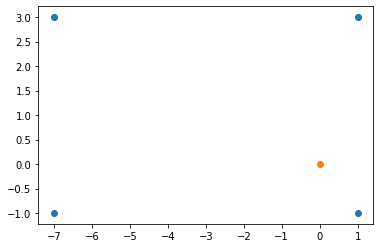

True

In [174]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    return x1**2 - 3*x1 + 4*abs(x1) + 2*x2**2 + x2 + 2*abs(x2)-5

x = [0,0]
subgrad = [0,0]

inSubdifferential(x,f,subgrad)



# Transformation

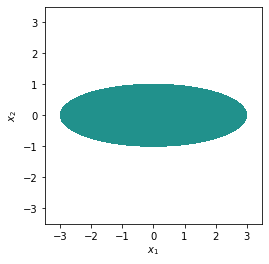

In [188]:
numPoints = 100
x1Line = np.linspace(-3.5,3.5,numPoints)
x2Line = np.linspace(-3.5,3.5,numPoints)
x1, x2 = np.meshgrid(x1Line,x2Line)
xspace = np.dstack([x1,x2])
def quadratic(Q,x):
    return np.dot(x,np.matmul(Q,x))
def y(f):
    return np.array([[quadratic(Q,f(x)) for x in row] for row in xspace])
Q = np.array([[1/9,0],[0,1]])
y1 = y(lambda x: x)
ax1 = plt.contourf(x1,x2,y1,[-10,1])
plt.ylabel("$x_2$")
plt.xlabel("$x_1$")
plt.gca().set_aspect('equal', adjustable='box')

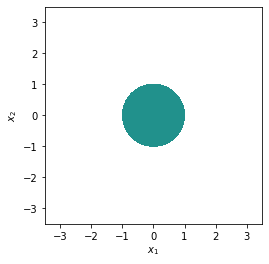

In [190]:
def affineTransform(A,x):
    return np.matmul(A,x)

A = np.array([[3,0],[0,1]])
Q = np.array([[1/9,0],[0,1]])
y2 = y(lambda x: affineTransform(A,x))
ax2 = plt.contourf(x1,x2,y2,[-10,1])
plt.ylabel("$x_2$")
plt.xlabel("$x_1$")
plt.gca().set_aspect('equal', adjustable='box')